In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install torchsummary


In [3]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.2 MB/s eta 0:00:00


In [4]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 11.4 MB/s eta 0:00:00


In [5]:
pip install torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [6]:
!pip install matplotlib

In [7]:
!pip install seaborn

In [8]:
import os                                      # for working with files
import sys
import shap                                    # for checking feature importances
import torch                                   # Pytorch module
import shutil
import optuna
import warnings
import numpy as np                             # for numerical computationss
import pandas as pd                            # for working with dataframes
import torch.nn as nn                          # for creating  neural networks
from PIL import Image                          # for checking images
import seaborn as sns
import matplotlib.pyplot as plt                # for plotting informations on graph and images using tensors
import torch.nn.functional as F                # for functions for calculating loss
from torchsummary import summary               # for getting the summary of our model
from torchvision.utils import make_grid        # for data checking
from torch.utils.data import DataLoader        # for dataloaders
import torchvision.transforms as transforms    # for transforming images into tensors
from torchvision.datasets import ImageFolder   # for working with classes and images
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


%matplotlib inline

In [9]:
os.listdir('/content/drive/MyDrive/miniproject/idata/Image Dataset/ImageDataset')

['train', 'test_data', 'valid']

In [12]:
data_dir='/content/drive/MyDrive/miniproject/idata/Image Dataset/ImageDataset/'

In [13]:
data_dir

'/content/drive/MyDrive/miniproject/idata/Image Dataset/ImageDataset/'

In [14]:
train_dir = data_dir + "train"
valid_dir = data_dir + "valid"
# test_dir
diseases_tr = os.listdir(train_dir)
diseases_va = os.listdir(valid_dir)

In [15]:
valid_dir

'/content/drive/MyDrive/miniproject/idata/Image Dataset/ImageDataset/valid'

In [16]:

# Number of images for each clas in the training data
nums_train = {}
for folder in sorted(os.listdir(f"{data_dir}train")):
    nums_train[folder] = len(os.listdir(f"{data_dir}train/{folder}"))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_training_class = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
img_per_training_class

,no. of images
early_blight,4005
healthy,4011
late_blight,4002


In [17]:
# Number of images for each clas in the training data
nums_valid = {}
for folder in sorted(os.listdir(f"{data_dir}/valid")):
    nums_valid[folder] = len(os.listdir(f"{data_dir}/valid/{folder}"))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_valid_class = pd.DataFrame(nums_valid.values(), index=nums_valid.keys(), columns=["no. of images"])
img_per_valid_class

,no. of images
early_blight,442
healthy,443
late_blight,446


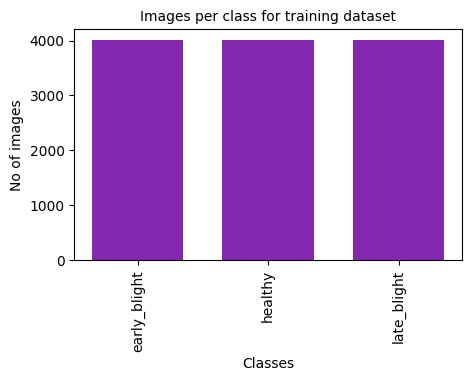

In [18]:
# plotting number of images available for each class
index = [n for n in range(3)]
plt.figure(figsize=(5, 3))
plt.bar(index, [n for n in nums_train.values()], color='#8528B0', width=0.7, align='center')
plt.xlabel('Classes', fontsize=10)
plt.ylabel('No of images', fontsize=10)
plt.xticks(index, [key for key in nums_train.keys()], fontsize=10, rotation=90)
plt.title('Images per class for training dataset', fontsize=10)

#plt.savefig('/kaggle/working/number_imgs_training.png', dpi=600, bbox_inches="tight")
plt.show()

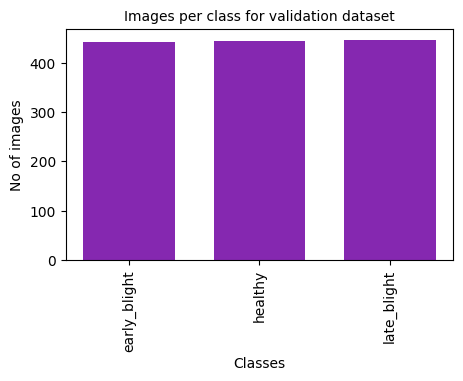

In [19]:
# plotting number of images available for each class
index = [n for n in range(3)]
plt.figure(figsize=(5, 3))
plt.bar(index, [n for n in nums_valid.values()], color='#8528B0', width=0.7)
plt.xlabel('Classes', fontsize=10)
plt.ylabel('No of images', fontsize=10 )
plt.xticks(index, [key for key in nums_valid.keys()], fontsize=10, rotation=90)
plt.title('Images per class for validation dataset', fontsize=10)
# plt.tight_layout()
#plt.savefig('/kaggle/working/number_imgs_validation.png', dpi=600, bbox_inches="tight")
plt.show()

In [20]:
n_train = 0
for value in nums_train.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 12018 images for training


In [21]:
n_valid = 0
for value in nums_valid.values():
    n_valid += value
print(f"There are {n_valid} images for validation")

There are 1331 images for validation


In [24]:
print(f"There are {len(os.listdir('/content/drive/MyDrive/miniproject/idata/Image Dataset/test_data/test'))} images for test")

There are 1331 images for test


In [25]:
# datasets for validation and training
train = ImageFolder(train_dir, transform=transforms.Compose(
                                        [transforms.Resize([224, 224]), #VGG-16 requires input images to be 224x224
                                         transforms.ToTensor()]))

valid = ImageFolder(valid_dir, transform=transforms.Compose(
                                        [transforms.Resize([224, 224]),
                                         transforms.ToTensor()]))

In [26]:
#Image shape
img, label = train[4590]
print(img.shape, label)

img, label = train[0]
print(img.shape, label)

torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 0


In [27]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

In [28]:
# Setting the seed value
random_seed = 7
torch.manual_seed(random_seed)

Label :late_blight(2)


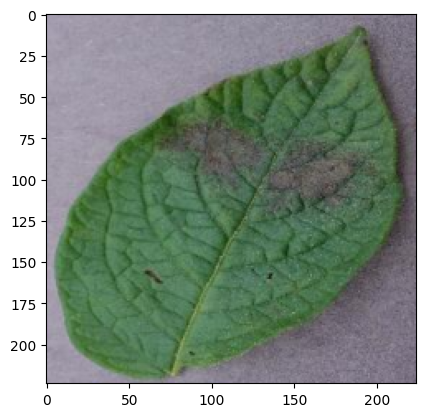

In [29]:
show_image(*train[10000])

In [30]:
print(train, '\n')
print(valid)

Dataset ImageFolder
    Number of datapoints: 12018
    Root location: /content/drive/MyDrive/miniproject/idata/Image Dataset/ImageDataset/train
    StandardTransform
Transform: Compose(
               Resize(size=[224, 224], interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           ) 

Dataset ImageFolder
    Number of datapoints: 1331
    Root location: /content/drive/MyDrive/miniproject/idata/Image Dataset/ImageDataset/valid
    StandardTransform
Transform: Compose(
               Resize(size=[224, 224], interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [31]:
# DataLoaders for training and validation
# setting the batch size
batch_size = 15
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


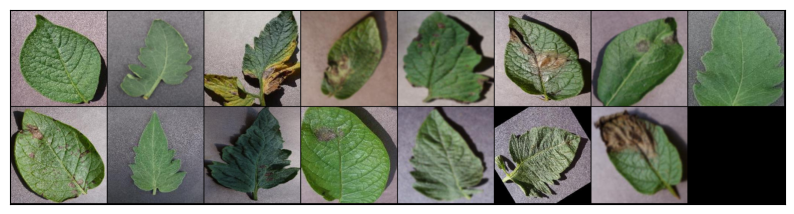

In [32]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

# Images for first batch of training
show_batch(train_dl)

In [33]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [34]:
device = get_default_device()
device

device(type='cuda')

In [35]:
# Moving data into GPU
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [36]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# base class for the model
class ImageClassificationBase(nn.Module):

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        train_acc = accuracy(out, labels)
        return loss

    def training_step_4_acc(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        train_acc = accuracy(out, labels)
        return train_acc


    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate prediction
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {"val_loss": loss.detach(), "val_accuracy": acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy} # Combine accuracies

    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, train_accuracy: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['train_accuracy'], result['val_loss'], result['val_accuracy']))


In [37]:
# Architecture for training

# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)


class VGG16(ImageClassificationBase):
    def __init__(self, num_classes):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(25088, 4096),  #or 25088, #(32x32768 and 25088x4096)
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [38]:
# defining the model and moving it to the GPU
model = to_device(VGG16(3), device)
model

VGG16(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=

In [39]:
# for training, added my code
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']


def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, momentum=0, weight_decay=0,
                 grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    optimizer = opt_func(model.parameters(), max_lr, weight_decay, momentum)


    # scheduler for one cycle learniing rate
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))


    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        train_accuracies = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            t_acc = model.training_step_4_acc(batch)
            train_losses.append(loss)
            train_accuracies.append(t_acc)
            loss.backward()


            # gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()


        # validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['train_accuracy'] = torch.stack(train_accuracies).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)

    return history


In [40]:
#%%time
history = [evaluate(model, valid_dl)]
history

[{'val_loss': tensor(1.0987, device='cuda:0'), 'val_accuracy': tensor(0.3311)}]

In [41]:
torch.cuda.empty_cache()

In [42]:
epochs = 5  #THESE ARE THE PARAMETERS FROM THE PAPAER...
max_lr = 0.0005
grad_clip = 0.1
weight_decay = 0.0005
opt_func = torch.optim.SGD

history += fit_OneCycle(epochs, max_lr, model, train_dl, valid_dl,
                             grad_clip=0.1, momentum=0.9,
                             weight_decay=0.0005,
                             opt_func=opt_func)



Epoch [0], last_lr: 0.00038, train_loss: 1.0415, train_accuracy: 0.4479, val_loss: 0.7317, val_acc: 0.7695
Epoch [1], last_lr: 0.00048, train_loss: 0.6925, train_accuracy: 0.7080, val_loss: 0.3717, val_acc: 0.8434
Epoch [2], last_lr: 0.00031, train_loss: 0.4625, train_accuracy: 0.8155, val_loss: 0.2906, val_acc: 0.8746
Epoch [3], last_lr: 0.00009, train_loss: 0.3298, train_accuracy: 0.8746, val_loss: 0.2085, val_acc: 0.9083
Epoch [4], last_lr: 0.00000, train_loss: 0.2647, train_accuracy: 0.9022, val_loss: 0.1852, val_acc: 0.9184


In [43]:
def plot_accuracies(history, epochs):
    val_accuracies = [x['val_accuracy'] for x in history[1:]]
    train_accuracies = [x['train_accuracy'] for x in history[1:]]
    plt.grid(color='#EAE4E3')
    plt.plot(train_accuracies, '-o', color='blue', label='train_accuracy')
    plt.plot(val_accuracies, '-o', color='green', label = 'validation_accuracy')
    plt.xticks(np.arange(0, epochs+1, 1))
    plt.xticks(rotation=90)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracies')
    plt.legend()
    plt.title('Training and Validation accuracies of VGG-16')
    plt.savefig('../working/vgg16-tv-accuracies.png', dpi=600,  bbox_inches="tight")


def plot_losses(history, epochs):
    train_losses = [x.get('train_loss') for x in history[1:]]
    val_losses = [x.get('val_loss').cpu().numpy() for x in history[1:]] #[x['val_loss'] for x in history]
    plt.grid(color='#EAE4E3')
    plt.plot(train_losses, '-bo', label='train_loss')
    plt.plot(val_losses, '-go', label='validation_loss')
    plt.xticks(np.arange(0, epochs+1, 1))
    plt.xticks(rotation=90)
    plt.xlabel('Epochs')
    plt.ylabel('Losses')
    plt.legend()#['Training', 'Validation'])
    plt.title('Training and Validation losses of VGG-16')
    plt.savefig('../working/vgg16-tv-losses.png', dpi=600,  bbox_inches="tight")


def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.grid(color='#EAE4E3')
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

In [44]:
len(history)

6

FileNotFoundError: [Errno 2] No such file or directory: '../working/vgg16-tv-accuracies.png'

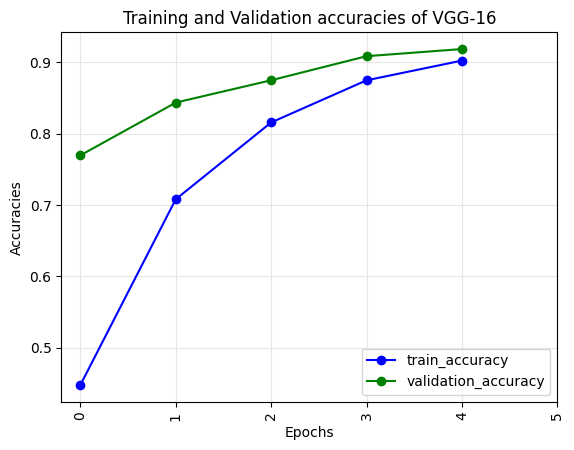

In [45]:
#Validation accuracy
plot_accuracies(history, epochs)

In [46]:
plt.rcParams['figure.figsize']=[8,8]

FileNotFoundError: [Errno 2] No such file or directory: '../working/vgg16-tv-losses.png'

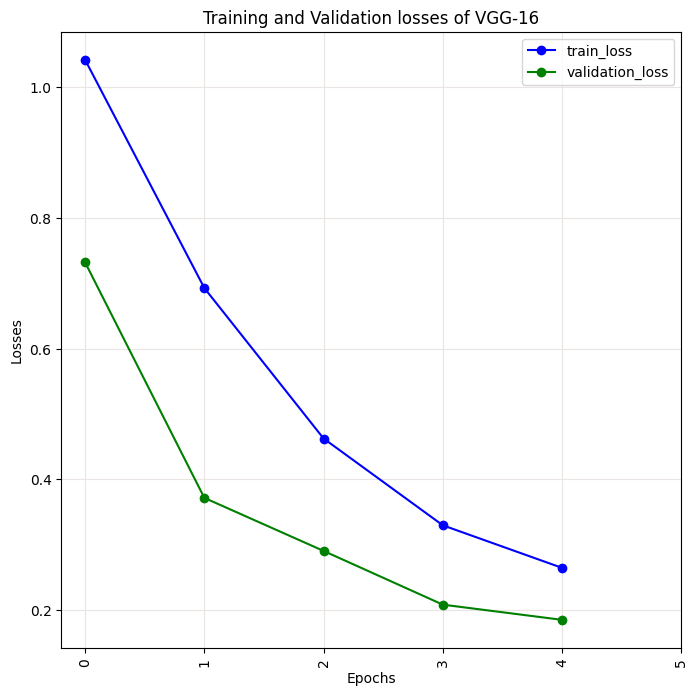

In [47]:
#Validation loss
plot_losses(history, epochs)

In [48]:
###Creating a new test dir because there was an svn file or folder found in the test dir
os.mkdir('../test_data')
os.mkdir('../test_data/test')

In [52]:
for f in os.listdir(f'{test_dir_new}/test'):
    os.remove(f'{test_dir_new}/test/{f}')

In [65]:
test_dir_old ='/content/drive/MyDrive/miniproject/idata/Image Dataset/test_data'
test_dir_new = '/content/drive/MyDrive/miniproject/idata/Image Dataset/ImageDataset/test_data'
print(test_dir_old)
print(test_dir_new)


/content/drive/MyDrive/miniproject/idata/Image Dataset/test_data
/content/drive/MyDrive/miniproject/idata/Image Dataset/ImageDataset/test_data


In [66]:
test_dir_old

'/content/drive/MyDrive/miniproject/idata/Image Dataset/test_data'

In [67]:
os.listdir(f'{test_dir_new}/test')

['late_blight', 'healthy', 'early_blight']

In [68]:

for theclass in train.classes:
#     print(f"{test_dir_new}/test/{theclass}")
    os.mkdir(f"{test_dir_new}/test/{theclass}")

FileExistsError: [Errno 17] File exists: '/content/drive/MyDrive/miniproject/idata/Image Dataset/ImageDataset/test_data/test/early_blight'

In [69]:
os.listdir(f'{test_dir_new}/test')

['late_blight', 'healthy', 'early_blight']

In [70]:
###Moving file from old test dir to new test dir
num_moved = 0
for img in os.listdir(test_dir_old+'/test'):
    if img.endswith('.JPG'):
        if img.split('_')[1] !='healthy':
            theclass = img.split('_')[1] + '_blight'
            #print(theclass)
            shutil.copy(f"{test_dir_old+'/test/'}{img}", f"{test_dir_new+'/test/'+theclass+'/'+img}")

        elif img.split('_')[1] =='healthy':
            theclass = img.split('_')[1]
            #print(theclass)
            shutil.copy(f"{test_dir_old+'/test/'}{img}", f"{test_dir_new+'/test/'+theclass+'/'+img}")

        num_moved += 1
    elif img.endswith('svn'):
        print('not going to move you!')
print(f"Number of files moved: {num_moved}")

Number of files moved: 1331


In [71]:
len(os.listdir(f'{test_dir_new}/test'))

3

In [73]:
len(os.listdir(f'{test_dir_new}/test'))

3

In [74]:
len(os.listdir('../test_data/test'))

3

In [75]:
os.listdir(f"{test_dir_new}")

['test']

In [77]:
#Testing model on test data
test = ImageFolder('/content/drive/MyDrive/miniproject/idata/Image Dataset/ImageDataset/test_data/test', transform=transforms.Compose(
                                        [transforms.Resize([224, 224]),
                                         transforms.ToTensor()]))

In [78]:

test

Dataset ImageFolder
    Number of datapoints: 1331
    Root location: /content/drive/MyDrive/miniproject/idata/Image Dataset/ImageDataset/test_data/test
    StandardTransform
Transform: Compose(
               Resize(size=[224, 224], interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [79]:
os.listdir(test_dir_new + '/test')

['late_blight', 'healthy', 'early_blight']

In [80]:
early = os.listdir(test_dir_new + '/test/healthy')
healthy = os.listdir(test_dir_new + '/test/early_blight')
late = os.listdir(test_dir_new + '/test/late_blight')

test_images = sorted(early+healthy+late) # since images in test folder are not in alphabetical order
print(len(test_images))

1331


In [81]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]

In [82]:

len(test)

1331

In [83]:
img, label = test[-1]
label

0

In [84]:

print(len(test_images))
print(len(test))

1331
1331


Label: tomato_late_87.JPG , Predicted: late_blight


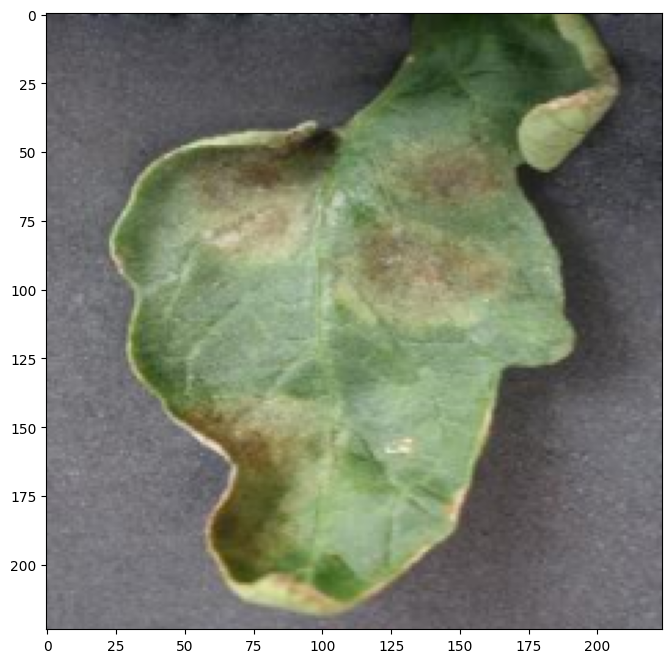

In [85]:
# predicting first image
img, label = test[-11]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[-11], ', Predicted:', predict_image(img, model))

In [86]:

type(test)

torchvision.datasets.folder.ImageFolder

In [87]:
test_loader_r = torch.utils.data.DataLoader(test,
                                            batch_size=batch_size,
                                            shuffle=True)

test_loader_r = DeviceDataLoader(test_loader_r, device)
test_loader_r

In [88]:
predictions =[] #code adapted from https://stackoverflow.com/questions/63647547/how-to-find-confusion-matrix-and-plot-it-for-image-classifier-in-pytorch
targets = []
for images, labels in test_loader_r:
    images, labels = images.cuda(), labels.cuda()
    logps = model(images)
    output = torch.exp(logps)
    pred = torch.argmax(output, 1)

    # convert to numpy arrays
    pred = pred.detach().cpu().numpy()
    labels = labels.detach().cpu().numpy()

    for i in range(len(pred)):
        predictions.append(pred[i])
        targets.append(labels[i])

In [89]:

train.classes

['early_blight', 'healthy', 'late_blight']

In [90]:

targets[:5]

[2, 2, 0, 0, 2]

In [91]:
predictions[:5]

[2, 2, 0, 0, 2]

In [92]:
cf_matrix = confusion_matrix(targets, predictions)
cf_matrix

array([[413,   4,  25],
       [  0, 246,   4],
       [ 56,   6, 577]])

In [93]:

class_names = train.classes
dataframe = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)
dataframe

,early_blight,healthy,late_blight
early_blight,413,4,25
healthy,0,246,4
late_blight,56,6,577


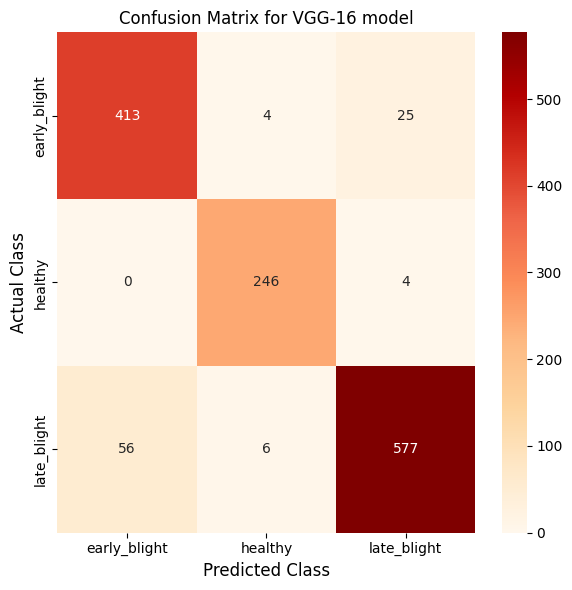

In [95]:
plt.figure(figsize=(6, 6))  #change size to 4, 4?

#Create heatmap
sns.heatmap(dataframe, annot=True, cbar=True,cmap="OrRd",fmt="d") #'purples', 'PuRd'
plt.title("Confusion Matrix for VGG-16 model", size=12), plt.tight_layout()

plt.ylabel("Actual Class", size=12),
plt.xlabel("Predicted Class",  size=12)
plt.tight_layout()
#plt.savefig('../working/cmatrxvgg16.png', dpi=600,  bbox_inches="tight")
plt.show()

In [96]:
print("Test Accuracy : {}".format(accuracy_score(targets, predictions)))
print("\nConfusion Matrix : ")
print(confusion_matrix(targets, predictions))
print("\nClassification Report :")
print(classification_report(targets, predictions, target_names=train.classes))

Test Accuracy : 0.9286250939143501

Confusion Matrix : 
[[413   4  25]
 [  0 246   4]
 [ 56   6 577]]

Classification Report :
              precision    recall  f1-score   support

early_blight       0.88      0.93      0.91       442
     healthy       0.96      0.98      0.97       250
 late_blight       0.95      0.90      0.93       639

    accuracy                           0.93      1331
   macro avg       0.93      0.94      0.94      1331
weighted avg       0.93      0.93      0.93      1331

